# Input-Output Operations

## Basic I/O with Python

### Writing Objects to Disk

In [1]:
path = './data/'

In [2]:
import numpy as np
from random import gauss

In [3]:
a = [gauss(1.5, 2) for i in range(1000000)]
  # generation of normally distributed randoms

In [4]:
import pickle

In [5]:
pkl_file = open(path + 'data.pkl', 'w')
  # open file for writing
  # Note: existing file might be overwritten

In [6]:
%time pickle.dump(a, pkl_file)

Wall time: 2.6 s


In [7]:
pkl_file

<open file './data/data.pkl', mode 'w' at 0x0000000003D80D20>

In [8]:
pkl_file.close()

In [9]:
#ll $path*

In [10]:
pkl_file = open(path + 'data.pkl', 'r')  # open file for reading

In [11]:
%time b = pickle.load(pkl_file)

Wall time: 2.04 s


In [12]:
b[:5]

[-0.692782281700211,
 1.231169355139374,
 0.21980448091545002,
 1.5357307181078306,
 2.7731784867989937]

In [13]:
a[:5]

[-0.692782281700211,
 1.231169355139374,
 0.21980448091545002,
 1.5357307181078306,
 2.7731784867989937]

In [14]:
np.allclose(np.array(a), np.array(b))

True

In [15]:
np.sum(np.array(a) - np.array(b))

0.0

In [16]:
pkl_file = open(path + 'data.pkl', 'w')  # open file for writing

In [17]:
%time pickle.dump(np.array(a), pkl_file)

Wall time: 691 ms


In [18]:
%time pickle.dump(np.array(a) ** 2, pkl_file)

Wall time: 671 ms


In [19]:
pkl_file.close()

In [20]:
#ll $path*

In [21]:
pkl_file = open(path + 'data.pkl', 'r')  # open file for reading

In [22]:
x = pickle.load(pkl_file)
x

array([-0.69278228,  1.23116936,  0.21980448, ..., -0.21448257,
        0.76645834, -1.03059949])

In [23]:
y = pickle.load(pkl_file)
y

array([ 0.47994729,  1.51577798,  0.04831401, ...,  0.04600277,
        0.58745839,  1.06213532])

In [24]:
pkl_file.close()


In [25]:
pkl_file = open(path + 'data.pkl', 'w')  # open file for writing
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [26]:
pkl_file = open(path + 'data.pkl', 'r')  # open file for writing
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print key, data[key][:4]

y [ 0.47994729  1.51577798  0.04831401  2.35846884]
x [-0.69278228  1.23116936  0.21980448  1.53573072]


In [27]:
#!rm -f $path*

### Reading and Writing Text Files

In [28]:
rows = 5000
a = np.random.standard_normal((rows, 5))  # dummy data

In [29]:
a.round(4)

array([[ -5.57900000e-01,   1.29550000e+00,   3.98600000e-01,
         -1.56520000e+00,  -8.84000000e-02],
       [ -9.95200000e-01,   2.60000000e-03,   8.54000000e-02,
         -1.28940000e+00,  -1.74200000e-01],
       [ -1.18340000e+00,   5.19500000e-01,   2.05900000e-01,
          1.23180000e+00,  -7.49500000e-01],
       ..., 
       [  3.26800000e-01,   1.24900000e-01,  -5.49700000e-01,
          3.17900000e-01,  -1.29730000e+00],
       [  1.04810000e+00,  -8.49700000e-01,  -1.51800000e+00,
         -8.18000000e-02,  -7.81000000e-02],
       [  7.82500000e-01,  -1.60350000e+00,   5.91000000e-02,
         -4.64700000e-01,  -2.60400000e+00]])

In [30]:
import pandas as pd
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')
    # set of hourly datetime objects

In [31]:
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [32]:
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [33]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

In [34]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [35]:
#ll $path*

In [36]:
csv_file = open(path + 'data.csv', 'r')  # open file for reading

In [37]:
for i in range(5):
    print csv_file.readline(),

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.557866,1.295497,0.398596,-1.565177,-0.088375
2014-01-01 01:00:00,-0.995214,0.002606,0.085438,-1.289392,-0.174190
2014-01-01 02:00:00,-1.183367,0.519459,0.205871,1.231781,-0.749527
2014-01-01 03:00:00,0.303203,-0.187024,2.466403,0.844392,0.258555


In [38]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print line,

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.557866,1.295497,0.398596,-1.565177,-0.088375
2014-01-01 01:00:00,-0.995214,0.002606,0.085438,-1.289392,-0.174190
2014-01-01 02:00:00,-1.183367,0.519459,0.205871,1.231781,-0.749527
2014-01-01 03:00:00,0.303203,-0.187024,2.466403,0.844392,0.258555


In [39]:
csv_file.close()
#!rm -f $path*

### SQL Databases

In [40]:
import sqlite3 as sq3

In [41]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [42]:
con = sq3.connect(path + 'numbs.db')

In [43]:
con.execute(query)

OperationalError: table numbs already exists

In [64]:
con.commit()

In [65]:
import datetime as dt

In [66]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [67]:
data = np.random.standard_normal((10000, 2)).round(5)

In [68]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [69]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[(u'2017-10-25 18:27:37.181000', 0.12, 7.3),
 (u'2017-10-25 18:27:37.234000', -0.45777, 1.10443),
 (u'2017-10-25 18:27:37.234000', 1.01282, -0.05483),
 (u'2017-10-25 18:27:37.234000', -1.21075, 1.44615),
 (u'2017-10-25 18:27:37.234000', -2.19511, -0.40858),
 (u'2017-10-25 18:27:37.234000', -0.14114, -0.70196),
 (u'2017-10-25 18:27:37.234000', -0.84992, 0.33799),
 (u'2017-10-25 18:27:37.234000', 0.4927, 0.60202),
 (u'2017-10-25 18:27:37.234000', 1.68154, 1.37235),
 (u'2017-10-25 18:27:37.234000', 0.45813, 1.4114)]

In [70]:
pointer = con.execute('SELECT * FROM numbs')

In [71]:
for i in range(3):
    print pointer.fetchone()

(u'2017-10-25 18:27:37.181000', 0.12, 7.3)
(u'2017-10-25 18:27:37.234000', -0.45777, 1.10443)
(u'2017-10-25 18:27:37.234000', 1.01282, -0.05483)


In [72]:
con.close()
#!rm -f $path*

### Writing and Reading Numpy Arrays

In [73]:
import numpy as np

In [74]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                  dtype='datetime64[m]')  # minute intervals
len(dtimes)

3681360

In [75]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [76]:
data['Date'] = dtimes

In [77]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [78]:
%time np.save(path + 'array', data)  # suffix .npy is added

Wall time: 492 ms


In [79]:
#ll $path*

In [80]:
%time np.load(path + 'array.npy')

Wall time: 49 ms


array([ (datetime.datetime(2015, 1, 1, 10, 0), -1.111799955368042, -0.7171000242233276),
       (datetime.datetime(2015, 1, 1, 10, 1), 0.42100998759269714, -0.19678999483585358),
       (datetime.datetime(2015, 1, 1, 10, 2), -0.6946099996566772, -0.03621000051498413),
       ...,
       (datetime.datetime(2021, 12, 31, 21, 57), -0.801360011100769, 0.6729599833488464),
       (datetime.datetime(2021, 12, 31, 21, 58), -0.12372999638319016, -0.34259000420570374),
       (datetime.datetime(2021, 12, 31, 21, 59), 0.7232199907302856, 0.4958899915218353)], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [81]:
data = np.random.standard_normal((10000, 6000))

In [82]:
%time np.save(path + 'array', data) 

Wall time: 4.13 s


In [83]:
#ll $path*

In [84]:
%time np.load(path + 'array.npy')

Wall time: 246 ms


array([[ 0.06896035, -0.61164641, -0.61981061, ...,  0.32465819,
        -1.35816669, -0.32391648],
       [ 0.53400283, -0.16304103,  1.58668561, ..., -1.17688367,
        -0.73593433,  1.35189519],
       [ 1.19360064, -0.78623175, -0.19809803, ...,  1.10539523,
         0.18681773,  1.49396747],
       ..., 
       [ 1.27965864,  0.44746797,  1.15511536, ...,  0.03221515,
         0.919024  , -0.15210415],
       [-2.00558996, -0.57791071, -2.00224829, ...,  1.38551841,
        -1.14761673,  0.39269276],
       [-0.21397213,  0.3867423 ,  1.31569966, ...,  0.11557096,
         0.11927739, -0.47458106]])

In [85]:
data = 0.0
#!rm -f $path*

## I/O with pandas

In [86]:
import numpy as np
import pandas as pd
#data = np.random.standard_normal((1000000, 5)).round(5)
data = np.random.standard_normal((100000, 5)).round(5)
        # sample data set

In [87]:
filename = path + 'numbs'

### SQL Database

In [88]:
import sqlite3 as sq3

In [89]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [90]:
con = sq3.Connection(filename + '.db')

In [91]:
con.execute(query)

OperationalError: table numbers already exists

In [92]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

Wall time: 1.23 s


In [93]:
#ll $path*

In [94]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print temp[:2]
temp = 0.0

[(0.77915, -0.62803, 0.20519, 0.2992, -2.6655), (-0.54093, -1.84287, 0.14593, 0.28671, -0.32875)]
Wall time: 3.03 s


In [95]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

Wall time: 613 ms


(-4.5, 0.5)

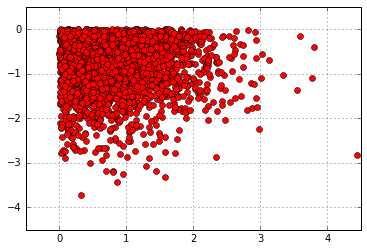

In [96]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)
# tag: scatter_query
# title: Plot of the query result
# size: 60

### From SQL to pandas

In [97]:
import pandas.io.sql as pds

In [98]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

Wall time: 2.26 s


In [99]:
data.head()

,No1,No2,No3,No4,No5
0,0.77915,-0.62803,0.20519,0.29920,-2.66550
1,-0.54093,-1.84287,0.14593,0.28671,-0.32875
2,1.64160,0.34304,0.53450,0.30673,1.05967
3,0.72557,0.29712,-1.44313,-1.46564,-0.27152
4,1.19265,0.92777,0.31236,-1.30594,-0.36628


In [100]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

Wall time: 25 ms


,No1,No2,No3,No4,No5
0,0.77915,-0.62803,0.20519,0.29920,-2.66550
6,1.21707,-1.02526,0.02860,-0.11699,0.07090
14,0.30603,-0.22354,-0.63357,0.00454,0.43820
18,0.22056,-1.93693,-0.46671,-1.28215,1.36013
23,1.07726,-1.23994,-2.52635,1.50218,-0.34868


In [101]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))
                     & ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 37 ms


(-4.4452600000000002,
 4.7185100000000002,
 -4.8373299999999997,
 4.6339399999999999)

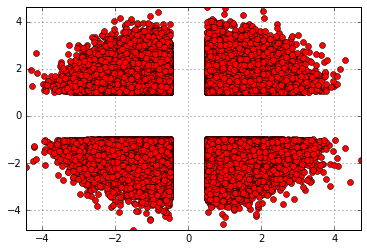

In [102]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')
# tag: data_scatter_1
# title: Scatter plot of complex query results
# size: 55

In [103]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

In [104]:
%time h5s['data'] = data

Wall time: 265 ms


In [105]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./data/numbs.h5s
/data            frame        (shape->[1100000,5])

In [106]:
h5s.close()

In [107]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

Wall time: 37 ms


In [108]:
np.allclose(np.array(temp), np.array(data))

True

In [109]:
temp = 0.0

In [110]:
#ll $path*

### Data as CSV File

In [111]:
%time data.to_csv(filename + '.csv')

Wall time: 8.18 s


Wall time: 1.43 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002A467668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002D5F0160>]], dtype=object)

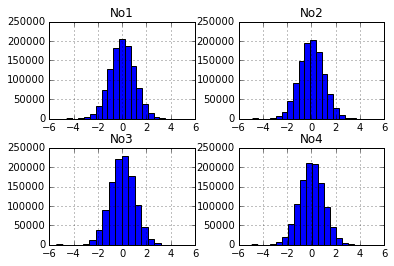

In [112]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20)
# tag: data_hist_3
# title: Histogram of 4 data sets
# size: 60

### Data as Excel File

In [113]:
#%time data[:100000].to_excel(filename + '.xlsx')
%time data[:1000].to_excel(filename + '.xlsx')

Wall time: 133 ms


Wall time: 270 ms


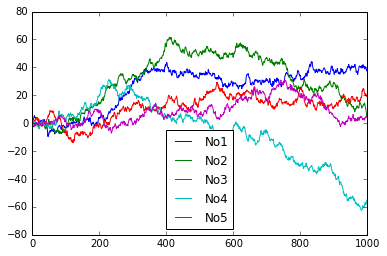

In [114]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# tag: data_paths
# title: Paths of random data from Excel file
# size: 60

In [115]:
#ll $path*

In [116]:
#rm -f $path*

## Fast I/O with PyTables

In [117]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Working with Tables

In [118]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w') 

In [119]:
#rows = 2000000
rows = 80000

In [120]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
    }

In [121]:
filters = tb.Filters(complevel=0)  # no compression
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [122]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [123]:
pointer = tab.row

In [124]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [125]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1] 
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1] 
    pointer.append()
      # this appends the data and
      # moves the pointer one row forward
tab.flush()

Wall time: 285 ms


In [126]:
tab

/ints_floats (Table(80000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [127]:
#ll $path*

In [128]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [129]:
sarray

array([('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0),
       ..., ('', 0, 0, 0.0, 0.0), ('', 0, 0, 0.0, 0.0),
       ('', 0, 0, 0.0, 0.0)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [130]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

Wall time: 10 ms


In [131]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

Wall time: 4 ms


/ints_floats_from_array (Table(80000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [132]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(80000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)
/ints_floats_from_array (Table(80000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [133]:
h5.remove_node('/', 'ints_floats_from_array')

In [134]:
tab[:3]

array([('2017-10-27 18:50:38.954000', 2029, 469, -0.02265, 0.56306),
       ('2017-10-27 18:50:38.954000', 5685, 4729, 0.36008, -0.85444),
       ('2017-10-27 18:50:38.954000', 8369, 7260, -0.67941, 0.7464)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [135]:
tab[:4]['No4']

array([ 0.56306, -0.85444,  0.7464 ,  1.24589])

In [136]:
%time np.sum(tab[:]['No3'])

Wall time: 5 ms


126.85493999999994

In [137]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 7 ms


5334591.9148891931

80000
Wall time: 77 ms


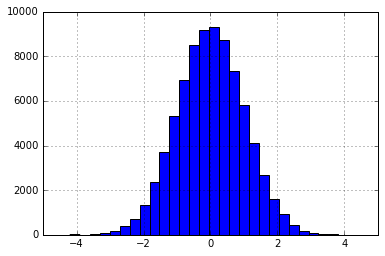

In [138]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print len(tab[:]['No3'])
# tag: data_hist
# title: Histogram of data
# size: 60

In [139]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
        tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                 & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 108 ms


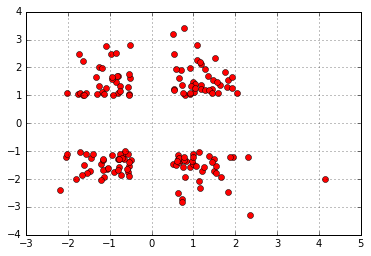

In [140]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)
# tag: scatter_data
# title: Scatter plot of query result
# size: 70

In [141]:
%%time
values = tab.cols.No3[:]
print "Max %18.3f" % values.max()
print "Ave %18.3f" % values.mean()
print "Min %18.3f" % values.min()
print "Std %18.3f" % values.std()

Max              4.711
Ave              0.002
Min             -4.196
Std              1.000
Wall time: 4 ms


In [142]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('((No1 > 9800) | (No1 < 200)) \
                    & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print res

(112, 4505)
(9993, 4795)
(49, 4684)
(9814, 4654)
Wall time: 8 ms


In [143]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('(No1 == 1234) & (No2 > 9776)')]
for res in results:
    print res

Wall time: 5 ms


### Working with Compressed Tables

In [144]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w') 

In [145]:
filters = tb.Filters(complevel=4, complib='blosc')

In [146]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [147]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
             tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                       & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 21 ms


In [148]:
%time arr_non = tab.read()

Wall time: 3 ms


In [149]:
%time arr_com = tabc.read()

Wall time: 5 ms


In [150]:
#ll $path*

In [151]:
h5c.close()

### Working with Arrays

In [152]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

Wall time: 3 ms


In [153]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(80000L, 2L)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(80000L, 2L)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(80000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1310,)

In [154]:
#ll $path*

In [155]:
h5.close()

In [156]:
#!rm -f $path*

### Out-of-Memory Computations

In [157]:
filename = path + 'array.h5'
h5 = tb.open_file(filename, 'w') 

In [158]:
n = 100
#ear = h5.createEArray(h5.root, 'ear',atom=tb.Float64Atom(), shape=(0, n))

In [ ]:
%%time
rand = np.random.standard_normal((n, n))
for i in range(750):
    ear.append(rand)
ear.flush()

In [ ]:
ear

In [139]:
ear.size_on_disk

NameError: name 'ear' is not defined

In [142]:
out = h5.createEArray(h5.root, 'out',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

AttributeError: 'File' object has no attribute 'createEArray'

In [143]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
  # the numerical expression as a string object
expr.setOutput(out, append_mode=True)
  # target to store results is disk-based array

NameError: name ``ear`` is not defined

In [144]:
%time expr.eval()
  # evaluation of the numerical expression
  # and storage of results in disk-based array

NameError: name 'expr' is not defined

In [145]:
out[0, :10]

NameError: name 'out' is not defined

In [146]:
%time imarray = ear.read()
  # read whole array into memory

NameError: name 'ear' is not defined

In [147]:
import numexpr as ne
expr = '3 * sin(imarray) + sqrt(abs(imarray))'

In [148]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0, :10]

KeyError: 'imarray'

In [149]:
h5.close()

In [ ]:
#!rm -f $path*

## Conclusions

## Further Reading